In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

### Details of column
- datetime - hourly date + timestamp 
    - datatime - 타임스탬프 형식으로 표현, 연-월-일 시:분:초
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
    - season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday - whether the day is considered a holiday
    - holiday - 공휴일(1), 공휴일X (0)

- workingday - whether the day is neither a weekend nor holiday
    - workingday - 근무일(1), 근무일X (0)

- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy / 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist / 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds / 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    - weather(날씨) - (1) 맑음, 약간의 구름, 부분 구름
                 (2) 약간의 구름과 안개
                 (3) 약간의 눈이나 비, 천둥
                 (4) 심한 비, 우박, 천둥, 안개, 눈
- temp - temperature in Celsius
    - temp(온도) - 섭씨
- atemp - "feels like" temperature in Celsius
    - atemp(체감온도) - 체감온도 섭씨
- humidity - relative humidity
    - humidity(습도) - 상대적인 습도
- windspeed - wind speed
    - windspeed - 풍속
- casual - number of non-registered user rentals initiated
    - casual - 비회원의 자전거 대여량
- registered - number of registered user rentals initiated
    - registered - 회원의 자전거 대여량
- count - number of total rentals
    - count - 총 대여량 (causal + registered)

In [44]:
# train.csv 파일을 train이라는 변수에 할당시킨다.
train = pd.read_csv('../bike-sharing-demand/train.csv', parse_dates=["datetime"])
# parse_dates

train.info()
# train.info()를 통해서 결측치가 없음을 알 수 있다.

#해당 데이터의 상위 5개의 열을 본다.
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [45]:
# test데이터 또한 위와 같이 불러온다. train 데이터와 마찬가지로 결측치가 없다.
test = pd.read_csv('../bike-sharing-demand/test.csv', parse_dates=["datetime"])
test.info()
test.head(5)

# test 데이터에는 3개의 정답 행이 제외되어 있는 것을 볼 수 있다. 
# 정답행 -> casual, registered, count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [46]:
# 모든 데이터는 숫자형식으로 되어 있지만 datetime만은 그렇지 않다. 따라서 전처리가 필요.
# dt.year / month / day / hour / minute / second를 활용하여 분리해준다.
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

# dayofweek를 활용해 날짜에서 요일을 가져온다.
# 0:월 / 1:화 / 2:수 / 3: 목 / 4:금 / 5:토 / 6:일
train["dayofweek"] = train["datetime"].dt.dayofweek
#del train["datetime"]

train.head(5)
# 입력한 열들 추가된 것을 확인해 볼 수 있다.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [47]:
# test 데이터도 위와 동일하게 만들어준다.
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

# dayofweek를 활용해 날짜에서 요일을 가져온다.
# 0:월 / 1:화 / 2:수 / 3: 목 / 4:금 / 5:토 / 6:일
test["dayofweek"] = test["datetime"].dt.dayofweek
test = test.drop(['datetime'], axis =1)
test.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


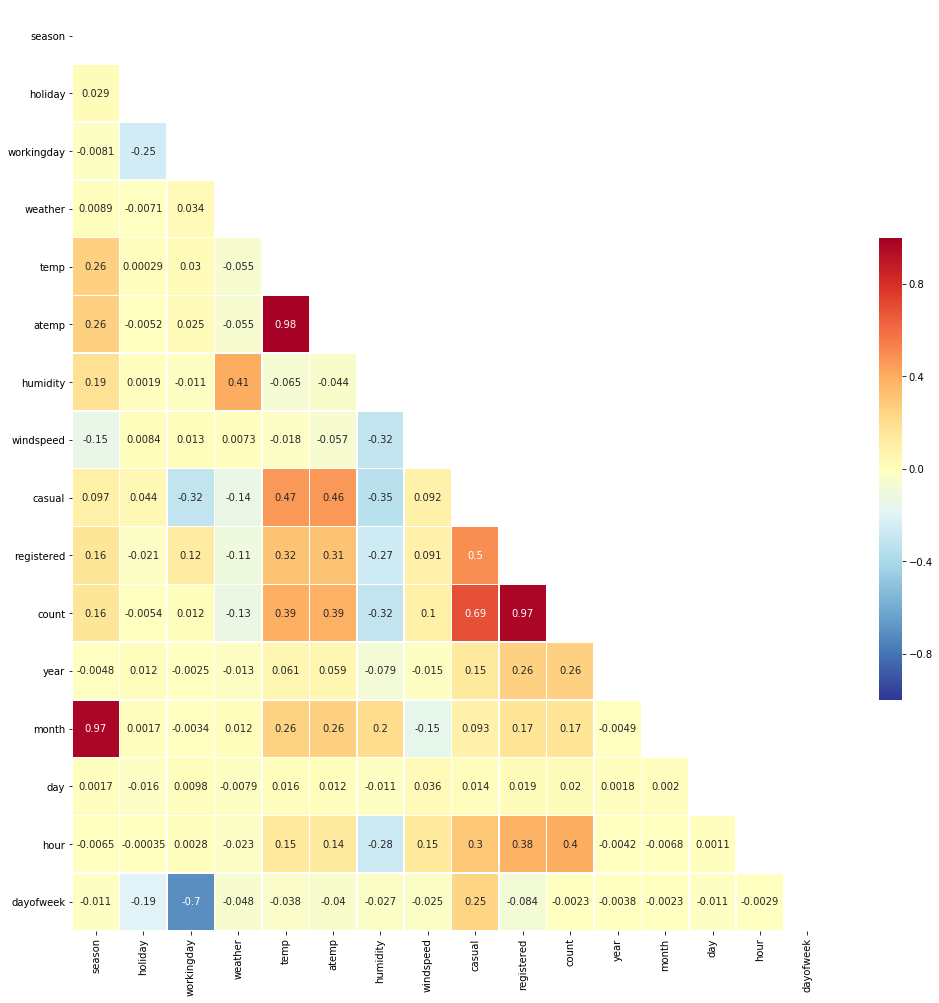

In [48]:
# 상관관계를 확인해보기 위해 아래와 같이 heatmap을 그려보았다.

df = train.copy()
df = df.drop(['datetime', 'minute', 'second'], axis =1)
# minute과 second는 의미가 없어보여, 우선 상관관계를 보는 곳에서는 제외시켰다.
df.head(5)

df = df.corr()
fig, ax = plt.subplots( figsize=(17,17) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


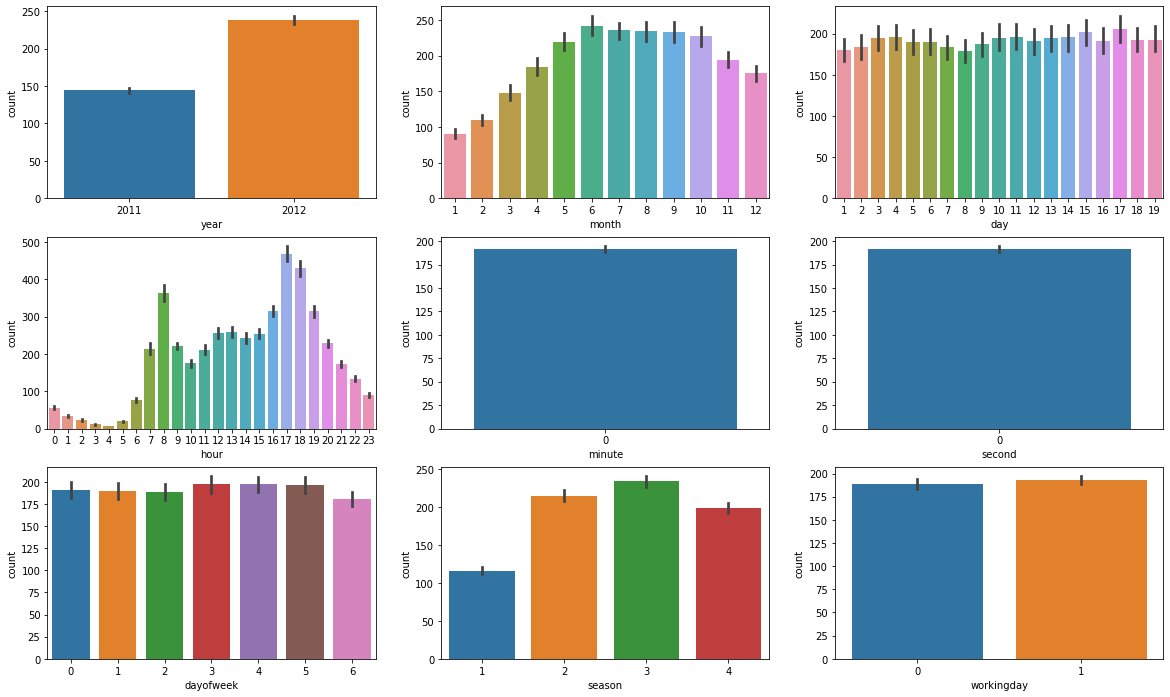

In [49]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows =3, ncols =3)

figure.set_size_inches(20, 12)
sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)
sns.barplot(data = train, x = "dayofweek", y = "count", ax = ax7)
sns.barplot(data = train, x = "season", y = "count", ax = ax8)
sns.barplot(data = train, x = "workingday", y = "count", ax = ax9)

# # 그래프들을 통해서 아래와 같이 유추해보았다.
# 1. 2011년보다 2012년에 자전거를 더 많이 탔다.
# 2. 6월이 가장 많이 이용했으며, 7,8,9월은 비슷, 그리고 1월이 가장 이용률이 낮음을 알 수 있다. -> 계절 및 날씨가 상관이 있을 수 있음을 유추.
# 3. day는 학습에서 제외시켜야 한다. -> train에는 19일까지 밖에 나와있지 않고, 그 이후는 모두 test에 있으므로 방해가 될 요소가 있다.
# 4. 자정에서 새벽5시까지는 이용률이 현저히 낮다. 아침 시간대에는 8시, 저녁에는 5시와 6시가 이용률이 많으므로 
# 사람들이 출퇴근 시간에 많이 이용하는 것이 아닐까 생각해볼 수 있다.
# 5. 일요일을 제외하고는 모든 날의 이용량이 비슷하다.
# 6. 위의 월에서 유추한 것과는 약간 다르게 겨울보다는 봄의 이용량이 더 낮다. 봄의 이용량이 가장 낮고, 가을 이용량이 가장 높다.
# 7. 근무일의 사용량이 미세하게 더 높다.


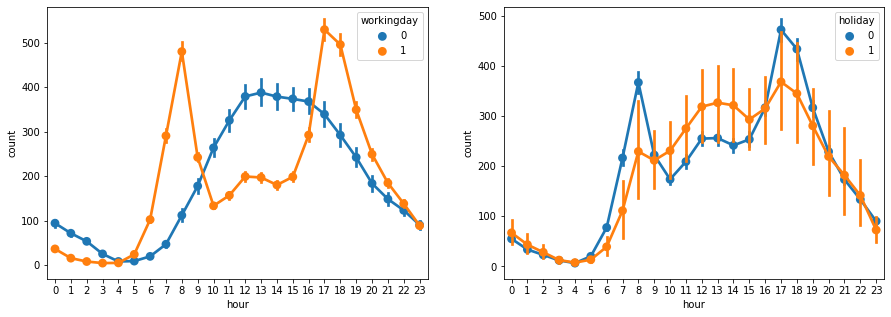

In [50]:
# workingday (근무일), holiday(휴일)의 차이가 크게 보이지 않으므로, 다른 특성과 함께 확인해본다.
figure, (ax1, ax2) = plt.subplots(nrows =1, ncols =2)
figure.set_size_inches(15, 5)
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax1)
sns.pointplot(data = train, x = "hour", y = "count", hue = "holiday", ax = ax2)

# 근무일과 휴일은 서로 상호 보완적인 관계이기 때문의 양 그래프가 거의 비슷하다.
# 우선 그래프 상에서 근무일에는 사람을이 주로 출퇴근에 자전거를 이용하는 것으로 보인다.
# 반면 공휴일에는 출퇴근 시간보다는 여가를 즐기는 시간에 이용하는 것으로 유추해볼 수 있다.


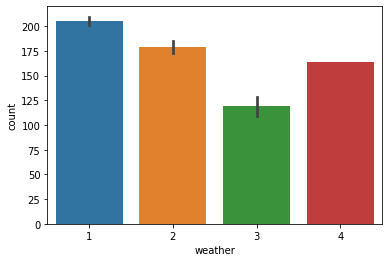

In [51]:
sns.barplot(data = train, x = "weather", y = "count")

# 날씨 좋은 날에 자전거를 많이 탈 것이다라는 예상과는 알맞게 1,2가 가장 많이 이용하는 것으로 나타남.
# 그러나, 4가 가장 나쁜 날씨임에도 불구하고 가장 3번째로 이용량이 많다는 것은 조금 의아하게 생각해볼 필요가 있음.

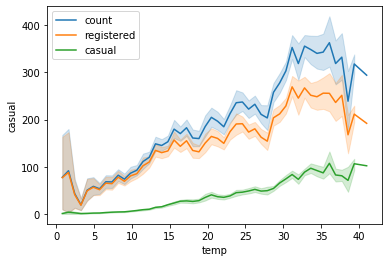

In [52]:
sns.lineplot(data = train, x = "temp", y = "count", label = 'count')
sns.lineplot(data = train, x = "temp", y = "registered", label = 'registered')
sns.lineplot(data = train, x = "temp", y = "casual", label = 'casual')

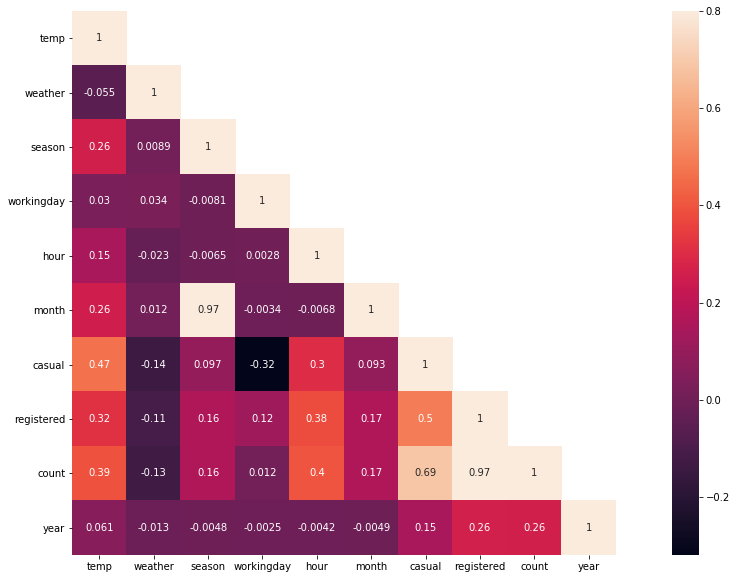

In [53]:
# 의미있어 보이는 feature들만 가지고 상관관계를 재분석 해보자.
re_corr = train [['temp', 'weather', 'season', 'workingday', 'hour', 'month', 'casual', 'registered', 'count', 'year']]
re_corr = re_corr.corr()
mask = np.array(re_corr)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(re_corr, mask=mask, vmax=.8, square=True, annot = True)
plt.show()

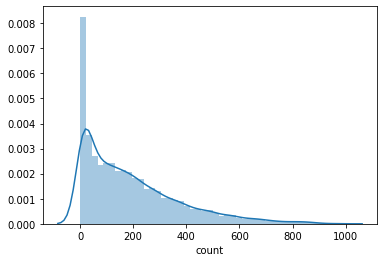

In [54]:
sns.distplot(train["count"]);
# count행을 살펴보니, 왼쪽으로 심하게 치우쳐져있는 모습을 보인다.

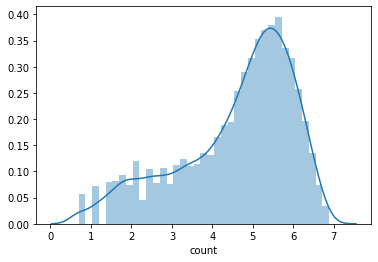

In [55]:
# 따라서 로그 변환을 사용하여 정규분포로 변환해준다.
train["count"] = np.log1p(train["count"])
sns.distplot(train["count"]);

In [56]:
# 정답인 count열을 y에 따로 떼어준다.
y = train[['count']]
y.head(5)

print(y.shape)

(10886, 1)


In [57]:
train = train.drop(['datetime','day', 'minute', 'second', 'windspeed', 'count', 'casual', 'registered'], axis=1)
train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,2011,1,4,5


# Modeling

In [81]:
x = train
x.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,2011,1,4,5


In [82]:
test.head()
test = test.drop(['windspeed', 'minute', 'day', 'second'], axis=1)

KeyError: "['windspeed' 'minute' 'day' 'second'] not found in axis"

In [83]:
test.head()

#train과 test의 열들을 다 맞춰주었다.

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,2011,1,4,3


In [84]:
x = x.values
y = y.apply(pd.to_numeric, errors = 'coerce')
y = y.values

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import model_selection, preprocessing

In [87]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state = 1, test_size = 0.3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7620, 11)
(3266, 11)
(7620, 1)
(3266, 1)


In [105]:
clf = LinearRegression(normalize= True)
clf.fit(x_train, y_train)
print("The accuracy of linear regression is: ", clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
for i in range(5):
    print('count:', y_test[i], '/predict_count:', y_pred[i])

The accuracy of linear regression is:  0.4921708624435428
count: [5.73334128] /predict_count: [4.63120522]
count: [2.7080502] /predict_count: [3.33543665]
count: [6.29156914] /predict_count: [6.16387391]
count: [4.9698133] /predict_count: [5.48053533]
count: [0.69314718] /predict_count: [3.9263455]


In [106]:
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
print("The accuracy of Decision Tree Regressor is: ", clf.score(x_test, y_test))
y_pred = clf.predict(x_test)
for i in range(5):
    print('count:', y_test[i], '/predict_count:', y_pred[i])

The accuracy of Decision Tree Regressor is:  0.9090210424520362
count: [5.73334128] /predict_count: 5.564520407322694
count: [2.7080502] /predict_count: 1.0986122886681098
count: [6.29156914] /predict_count: 6.391917113392602
count: [4.9698133] /predict_count: 4.955827057601261
count: [0.69314718] /predict_count: 2.1972245773362196


In [107]:
clf = RandomForestRegressor(n_estimators= 200)
clf.fit(x_train, y_train)
print('The accuracy of Random Forest Regressor is: ', clf.score(x_test, y_test))
y_pred = clf.predict(x_test)
for i in range(5):
    print('count:', y_test[i], '/predict_count:', y_pred[i])

/Users/soeunyi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The accuracy of Random Forest Regressor is:  0.9554506888571697
count: [5.73334128] /predict_count: 5.6507449364569755
count: [2.7080502] /predict_count: 1.6591023291849363
count: [6.29156914] /predict_count: 6.3530352294767445
count: [4.9698133] /predict_count: 5.000326407580759
count: [0.69314718] /predict_count: 1.944367803190763


In [95]:
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

### DNN

In [97]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [98]:
model = models.Sequential()

In [99]:
model.add(Dense(25, input_dim =11,))
model.add(Dense(10))
model.add(Dense(7))
model.add(Dense(5))
model.add(Dense(10))
model.add(Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 748
Trainable params: 748
Non-trainable params: 0
________________________________________________________

In [100]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])  
model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=1, verbose =1, callbacks=[early_stopping])  


Train on 6096 samples, validate on 1524 samples
Epoch 1/100
6096/6096 [==============================] - 13s 2ms/step - loss: 428.8330 - mse: 428.8312 - val_loss: 5.8953 - val_mse: 5.8953
Epoch 2/100
6096/6096 [==============================] - 14s 2ms/step - loss: 4.4275 - mse: 4.4275 - val_loss: 1.6738 - val_mse: 1.6738
Epoch 3/100
6096/6096 [==============================] - 20s 3ms/step - loss: 1.7075 - mse: 1.7075 - val_loss: 1.2948 - val_mse: 1.2948
Epoch 4/100
6096/6096 [==============================] - 16s 3ms/step - loss: 1.5827 - mse: 1.5827 - val_loss: 6.4107 - val_mse: 6.4107
Epoch 5/100
6096/6096 [==============================] - 15s 3ms/step - loss: 1.4125 - mse: 1.4125 - val_loss: 1.1453 - val_mse: 1.1453
Epoch 6/100
6096/6096 [==============================] - 15s 3ms/step - loss: 1.3106 - mse: 1.3106 - val_loss: 1.1524 - val_mse: 1.1524
Epoch 7/100
6096/6096 [==============================] - 16s 3ms/step - loss: 1.2843 - mse: 1.2843 - val_loss: 1.1019 - val_mse: 1.1

6096/6096 [==============================] - 15s 2ms/step - loss: 1.1251 - mse: 1.1251 - val_loss: 1.1248 - val_mse: 1.1248


In [101]:
loss, mse = model.evaluate(x_test, y_test, batch_size=1)
print("loss:",loss,"mse:", mse)

3266/3266 [==============================] - 2s 522us/step
loss: 1.1010682185552634 mse: 1.1010689735412598


In [102]:
y_pred = model.predict(x_test)
for i in range(5):
    print('count:', y_test[i], '/predict_count:', y_pred[i])

count: [5.73334128] /predict_count: [4.927093]
count: [2.7080502] /predict_count: [3.3875756]
count: [6.29156914] /predict_count: [5.9661694]
count: [4.9698133] /predict_count: [5.7778516]
count: [0.69314718] /predict_count: [3.9502535]


In [104]:
real_test = model.predict(test)
for j in range(len(test)):
    print (real_test[j])

[3.0873728]
[3.2255125]
[3.309628]
[3.3757756]
[3.4598913]
[3.4365234]
[3.4891996]
[3.6459107]
[3.7300262]
[3.8968387]
[4.0446806]
[4.2474303]
[4.4605656]
[4.4337487]
[4.5491843]
[4.6647387]
[4.6593394]
[4.7615423]
[4.6452103]
[4.6855693]
[4.7372785]
[4.790074]
[4.7835073]
[4.8676233]
[2.9003625]
[2.984478]
[3.021668]
[2.9837818]
[3.0127063]
[3.4223738]
[3.5837007]
[3.676485]
[3.818677]
[3.8447165]
[3.9689398]
[4.1714892]
[4.4588704]
[4.580693]
[4.606733]
[4.61357]
[4.715773]
[4.739412]
[4.7811375]
[4.847285]
[4.838436]
[4.836605]
[4.8096695]
[4.9554296]
[2.9204147]
[3.0342512]
[3.1544228]
[3.238538]
[3.1897008]
[3.4339762]
[3.492422]
[3.5584507]
[3.7355304]
[3.8634028]
[4.0225143]
[4.1426854]
[4.3481197]
[4.438569]
[4.6266]
[4.6927466]
[4.8489738]
[4.6784987]
[4.7807016]
[4.6702204]
[4.848468]
[4.8704553]
[4.7349877]
[2.822235]
[2.9063506]
[2.8864322]
[2.970548]
[3.250514]
[3.3346295]
[3.4592838]
[3.4359164]
[3.662887]
[3.9259138]
[4.089642]
[4.256136]
[4.3670077]
[4.5731254]
[4.65724

[3.7468867]
[3.9418545]
[4.175843]
[4.4859943]
[4.8529363]
[4.96849]
[5.185559]
[5.327751]
[5.247474]
[5.6278863]
[5.357629]
[5.352349]
[5.167755]
[5.2518706]
[5.0821986]
[5.0792003]
[5.163316]
[3.0549731]
[3.1551251]
[3.2392404]
[3.2681794]
[3.3837337]
[3.373652]
[3.5205264]
[3.6360807]
[3.949482]
[4.168951]
[4.479103]
[4.5632186]
[4.6641355]
[4.941681]
[5.216944]
[5.357969]
[5.3537364]
[5.437852]
[5.447091]
[5.499767]
[5.525807]
[5.449099]
[5.4436994]
[5.3878446]
[3.7045774]
[3.7125301]
[3.5392895]
[3.5194898]
[3.7075205]
[3.6877213]
[3.8031569]
[3.9913063]
[4.075422]
[4.4168935]
[4.5904045]
[4.7640357]
[4.9375467]
[5.211643]
[5.180774]
[5.1898937]
[5.3175664]
[5.326805]
[5.3528447]
[5.2580495]
[5.3421645]
[5.3222466]
[5.292061]
[5.3761773]
[3.4557228]
[3.5398388]
[3.520039]
[3.611856]
[3.5697174]
[3.6615343]
[3.737949]
[3.9483185]
[4.032434]
[4.1299014]
[4.336019]
[4.5240498]
[4.6319027]
[4.6845794]
[4.907617]
[5.153724]
[5.1652446]
[4.9952884]
[5.0794044]
[5.1759214]
[5.182825]
[5.

[6.2116394]
[6.295755]
[6.37987]
[6.421596]
[6.080595]
[6.1570096]
[6.241125]
[6.2758336]
[6.3599486]
[4.4471965]
[4.398359]
[4.575439]
[4.6595545]
[4.6507063]
[4.734822]
[4.919603]
[5.0360055]
[5.195117]
[5.279233]
[5.5132213]
[5.522341]
[5.834775]
[5.791037]
[5.8496833]
[6.112709]
[6.196826]
[6.306411]
[6.3156495]
[6.2957306]
[6.3194885]
[6.1736355]
[6.1647873]
[6.1491203]
[4.0722165]
[4.1017056]
[4.0783377]
[4.1547523]
[4.152921]
[4.2370367]
[4.328854]
[4.4989157]
[4.6905146]
[4.996414]
[5.1955147]
[5.3367386]
[5.4208546]
[5.0762043]
[5.056405]
[5.010817]
[5.0949326]
[5.3736453]
[5.4890814]
[5.613304]
[5.6259923]
[5.5155106]
[5.5996265]
[5.6837416]
[3.8435845]
[3.9276996]
[3.8172178]
[3.9013338]
[3.999968]
[4.0020704]
[4.2407947]
[4.6524606]
[4.9096365]
[5.224889]
[5.484465]
[5.614419]
[5.759012]
[5.7850513]
[5.929526]
[6.074118]
[6.0287294]
[6.1128454]
[6.1219654]
[6.1346526]
[6.1438923]
[6.153012]
[6.1186934]
[6.1772203]
[4.372635]
[4.492606]
[4.501845]
[4.436087]
[4.6218357]
[4.6

[4.1667385]
[4.444284]
[4.8194103]
[4.8402834]
[5.1550517]
[5.239167]
[5.1865616]
[5.270677]
[5.26953]
[5.3459444]
[5.3082576]
[5.392373]
[5.5088954]
[5.518015]
[5.6288857]
[3.82451]
[3.9847884]
[3.9290147]
[4.01313]
[4.2267494]
[4.2708764]
[4.354992]
[4.3665123]
[4.660859]
[4.4766674]
[4.771014]
[4.7657337]
[5.0287604]
[5.1128755]
[5.138915]
[5.2811065]
[5.357521]
[5.262726]
[5.2573266]
[5.341442]
[5.394238]
[5.460266]
[5.5701704]
[5.743682]
[3.5325775]
[3.7386956]
[3.7683034]
[3.852419]
[3.9365344]
[3.892261]
[3.8724618]
[3.9384904]
[3.9612803]
[4.1875677]
[4.469796]
[4.553911]
[4.5271754]
[4.492857]
[4.7191443]
[4.80326]
[4.6580896]
[4.7422056]
[4.8186197]
[5.0839276]
[5.168044]
[5.3315725]
[5.415688]
[5.499803]
[3.6818657]
[3.4899735]
[3.8110762]
[4.050217]
[3.82235]
[3.9064655]
[3.8866668]
[3.852229]
[4.0625987]
[4.1780343]
[4.366184]
[4.5856533]
[5.051945]
[4.9884706]
[5.0725865]
[5.246217]
[5.240817]
[5.2355366]
[5.392247]
[5.476363]
[5.4060698]
[5.4901857]
[5.1427174]
[5.394793

[3.4356818]
[3.5197973]
[3.6655574]
[3.749673]
[3.7587924]
[3.8249402]
[3.7759838]
[3.8781867]
[4.051698]
[4.303774]
[4.401241]
[4.5817704]
[4.75885]
[4.9469995]
[5.0735044]
[5.095976]
[5.198179]
[5.1748114]
[5.3059335]
[5.2425766]
[5.251696]
[5.3614006]
[5.1794915]
[3.026425]
[3.0560327]
[3.0314975]
[3.0476346]
[3.0278354]
[3.111951]
[3.354608]
[3.5839138]
[3.685998]
[3.8015518]
[4.1975317]
[4.373444]
[4.6615753]
[4.658577]
[4.9384046]
[5.276427]
[5.3774624]
[5.490616]
[5.4997354]
[5.523374]
[5.518093]
[5.5272136]
[5.463857]
[5.42942]
[3.4585915]
[3.363796]
[3.5955024]
[3.9990363]
[3.7403326]
[3.824448]
[3.8335676]
[3.8863635]
[3.895483]
[4.054595]
[4.2135873]
[4.465663]
[4.6282234]
[4.7593455]
[4.9823837]
[5.1268573]
[5.181935]
[5.295088]
[5.350166]
[5.46332]
[5.458039]
[5.197685]
[5.2818]
[5.1967883]
[3.3200915]
[3.4622827]
[3.37739]
[3.2628565]
[3.3271728]
[3.4503093]
[3.3979037]
[3.600572]
[3.6365948]
[3.7207108]
[3.6997442]
[3.7280655]
[3.867239]
[3.951354]
[4.312081]
[4.4038973]

[5.5423617]
[3.6296086]
[3.7137246]
[3.79784]
[3.8819556]
[3.9583702]
[4.0424857]
[4.2563047]
[4.3404202]
[4.5284505]
[4.792645]
[4.804165]
[4.888281]
[5.093231]
[5.249942]
[5.3612447]
[5.4453597]
[5.5609145]
[5.64503]
[5.7291455]
[5.723746]
[5.7184663]
[5.7299867]
[5.8866982]
[5.8488107]
[3.5592222]
[3.6433382]
[3.66256]
[3.7466755]
[3.830791]
[3.9149065]
[4.139112]
[4.337528]
[4.5436463]
[4.739378]
[5.06048]
[5.3031373]
[5.3872533]
[5.4713683]
[5.4404993]
[5.6064286]
[5.7654214]
[5.849537]
[6.0027976]
[5.96836]
[5.8445272]
[5.9286427]
[5.9633517]
[5.9760394]
[3.9158149]
[3.8779287]
[3.8545609]
[3.9386764]
[4.022792]
[4.1069074]
[4.1910233]
[4.5046244]
[4.709574]
[5.2334065]
[5.242645]
[5.409339]
[5.4185777]
[5.57757]
[5.661686]
[5.7467685]
[5.71245]
[5.8220353]
[5.6982017]
[5.7823176]
[5.777037]
[5.8611536]
[5.945268]
[6.1274486]
[4.183377]
[4.2360535]
[4.2452917]
[4.2398925]
[4.292688]
[4.376804]
[4.460919]
[4.7941403]
[5.039198]
[5.227228]
[5.3246956]
[5.4983263]
[5.5824423]
[5.726

[4.096243]
[4.0908437]
[4.174959]
[4.15516]
[4.2392755]
[4.250796]
[4.5428605]
[4.7478113]
[5.1729474]
[5.404051]
[5.530556]
[5.6146717]
[5.6987877]
[5.8688493]
[5.9529653]
[6.0382476]
[5.5629272]
[5.4422593]
[5.526375]
[5.653164]
[5.6478834]
[5.731999]
[3.6440468]
[3.8733525]
[3.8535533]
[3.90623]
[4.0943794]
[3.9705462]
[4.245691]
[4.1387773]
[4.5347567]
[4.797783]
[5.014971]
[5.1305256]
[5.333074]
[5.4607477]
[5.58842]
[5.6289787]
[5.696293]
[5.853003]
[5.8766418]
[5.842205]
[6.0134344]
[5.9186387]
[5.913359]
[5.864403]
[4.041165]
[4.035765]
[4.030485]
[4.025086]
[3.9692311]
[4.193317]
[4.3669477]
[4.451063]
[4.4939036]
[4.8150063]
[5.0635138]
[5.237144]
[5.425294]
[5.5697675]
[5.6829205]
[5.767036]
[5.7907934]
[5.814432]
[5.8985476]
[5.9076676]
[5.931425]
[5.7761536]
[5.860268]
[5.975823]
[3.7200089]
[3.6734538]
[3.72613]
[3.9723554]
[3.9669561]
[3.905882]
[3.9405904]
[4.2193036]
[4.3830976]
[4.5566087]
[4.8196354]
[5.2592907]
[5.403883]
[5.6918955]
[5.7870812]
[5.873478]
[5.886166

### LSTM

In [111]:
x_train = x_train.reshape(x_train.shape[0],11,1)
x_test = x_train.reshape(x_train.shape[0],11,1)

print (x_train.shape)
print (x_test.shape)

(7620, 11, 1)
(7620, 11, 1)


In [112]:
from keras.layers import LSTM

In [113]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (11,1)))   # (열, 몇 개씩 자를지)
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])  
model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=1, verbose =1, callbacks=[early_stopping]) 

Train on 6096 samples, validate on 1524 samples
Epoch 1/100
6096/6096 [==============================] - 52s 9ms/step - loss: 2.1772 - mse: 2.1772 - val_loss: 0.9060 - val_mse: 0.9060
Epoch 2/100
6096/6096 [==============================] - 61s 10ms/step - loss: 0.7755 - mse: 0.7755 - val_loss: 0.4419 - val_mse: 0.4419
Epoch 3/100
6096/6096 [==============================] - 70s 11ms/step - loss: 0.5287 - mse: 0.5287 - val_loss: 0.3951 - val_mse: 0.3951
Epoch 4/100
6096/6096 [==============================] - 58s 10ms/step - loss: 0.4734 - mse: 0.4734 - val_loss: 0.3728 - val_mse: 0.3728
Epoch 5/100
6096/6096 [==============================] - 60s 10ms/step - loss: 0.5259 - mse: 0.5259 - val_loss: 0.4044 - val_mse: 0.4044
Epoch 6/100
6096/6096 [==============================] - 65s 11ms/step - loss: 0.4252 - mse: 0.4252 - val_loss: 0.5464 - val_mse: 0.5464
Epoch 7/100
6096/6096 [==============================] - 55s 9ms/step - loss: 0.3851 - mse: 0.3851 - val_loss: 0.3660 - val_mse: 0.

In [ ]:
loss, mse = model.evaluate(x_test, y_test, batch_size=1)
print("loss:",loss,"mse:", mse)

In [ ]:
y_pred = model.predict(x_test)
for i in range(5):
    print('count:', y_test[i], '/predict_count:', y_pred[i])

In [ ]:
real_test = model.predict(test)
for j in range(len(test)):
    print (real_test[j])